In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
from scipy.optimize import curve_fit

In [13]:
df = pd.read_csv('zee_Run2011A.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18885 entries, 0 to 18884
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Run           18885 non-null  int64  
 1   Event         18885 non-null  int64  
 2   pt1           18885 non-null  float64
 3   eta1          18885 non-null  float64
 4   phi1          18885 non-null  float64
 5   Q1            18885 non-null  int64  
 6   type1         18885 non-null  object 
 7   sigmaEtaEta1  18885 non-null  float64
 8   HoverE1       18885 non-null  float64
 9   isoTrack1     18885 non-null  float64
 10  isoEcal1      18885 non-null  float64
 11  isoHcal1      18885 non-null  float64
 12  pt2           18885 non-null  float64
 13  eta2          18885 non-null  float64
 14  phi2          18885 non-null  float64
 15  Q2            18885 non-null  int64  
 16  type2         18885 non-null  object 
 17  sigmaEtaEta2  18885 non-null  float64
 18  HoverE2       18885 non-nu

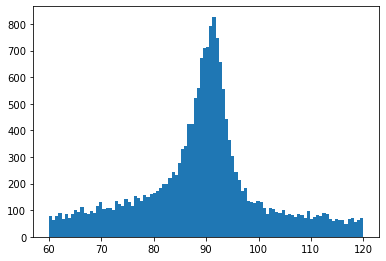

In [18]:
minv = (2*df.pt1*df.pt2*(np.cosh(df.eta1-df.eta2)-np.cos(df.phi1-df.phi2)))**(1/2)
df['invariant mass'] = minv

fig = plt.figure()
ax = fig.add_axes([0.1,0.1,0.8,0.8])
ax.hist(minv, bins=100);


In [49]:
def RBW(E,G,M,a,b,c):
    g = np.sqrt(M**2 * (M**2 + G**2))
    k = (2 * np.sqrt(2) * M * G * g)/(np.pi * np.sqrt(M**2 + g))
    f = lambda E: k/(((E**2)-(M**2))**2 + (M**2)*(G**2))
    return a*E + b + c*f(E)

[ 36.  19.  17.  34.  28.  32.  29.  28.  22.  25.  21.  37.  26.  27.
  18.  24.  32.  30.  36.  28.  35.  30.  31.  36.  26.  27.  33.  36.
  26.  33.  34.  37.  34.  37.  31.  34.  28.  30.  35.  24.  32.  25.
  45.  35.  39.  30.  36.  38.  39.  35.  32.  35.  30.  45.  39.  39.
  41.  27.  43.  38.  36.  52.  37.  37.  39.  31.  53.  34.  44.  44.
  46.  46.  39.  37.  49.  44.  56.  25.  51.  52.  56.  56.  43.  45.
  67.  55.  37.  50.  66.  60.  61.  74.  50.  52.  50.  71.  50.  70.
  72.  80.  64.  75.  97.  72.  76.  83.  96.  80.  89.  81.  96. 117.
 131. 106.  96. 115. 103. 133. 122. 120. 142. 121. 147. 123. 148. 165.
 174. 171. 158. 158. 167. 201. 184. 181. 169. 190. 181. 180. 236. 174.
 196. 196. 192. 232. 199. 228. 182. 180. 167. 189. 175. 146. 160. 152.
 139. 133. 133. 121. 111. 126.  99.  96.  97.  92.  81.  65.  78.  81.
  78.  86.  54.  56.  48.  68.  59.  59.  43.  40.  39.  51.  36.  58.
  46.  38.  42.  35.  31.  31.  46.  32.  24.  28.  40.  43.  24.  35.
  26. 

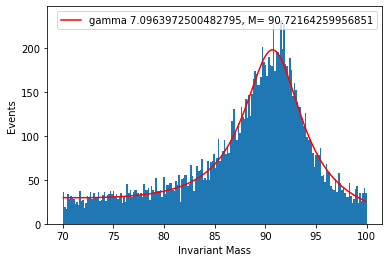

In [55]:
L = 70
U = 100
bins =200

fig = plt.figure()
H = plt.hist(minv, bins=bins, range=(L,U))

print(H[0][:], H[1][:])

y= H[0]
x= 0.5*(H[1][0:-1] + H[1][1:])
y_err= np.sqrt(y)

for i in range(len(y)):
    if y_err[i]==0:
        y_err[i]= 1.0
    else:
        y_err[i]= y_err[i]
        
I = [2.5, 91, -2, 200, 13000]
        
be, co = curve_fit(RBW, x, y, p0=I, sigma= y_err)
err = np.sqrt(np.diag(co))

plt.plot(x, RBW(x, *be), 'r-', label = 'gamma {}, M= {}'.format(be[0], be[1]))
plt.xlabel("Invariant Mass")
plt.ylabel("Events")
plt.legend();

be[1]
print('my best invariant mass is approximately be',be[1], 'which is not within the error margin of the wiki value of 91.1876 +- 0.0021')

Text(0.5, 1.0, 'Distributions of Eta1 and Eta2')

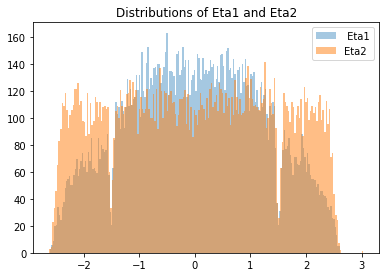

In [64]:
fig2= plt.figure()
ax2= fig2.add_axes([0.1, 0.1, 0.8, 0.8])
ax2.hist(df.eta1, alpha= 0.40, bins= 200, label =" Eta1")
ax2.hist(df.eta2, alpha= 0.5,  bins= 200, label = "Eta2")
ax2.legend()
ax2.set_title("Distributions of Eta1 and Eta2")

yes our assumption makes senses because each detector only covers a specific range. EB covers ranges -1.5 - 1.5, EE covers -2.5 - -1.5 and 1.5 - 2.5


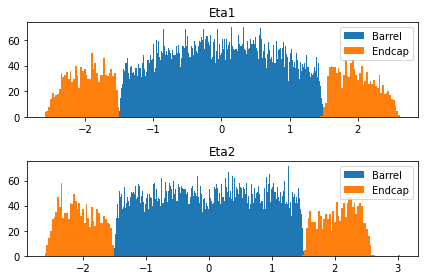

In [65]:
EB = df[(df['type1']=='EB') & (df['type2']=='EB')] #barrel
EE = df[(df['type1']=='EE') & (df['type2']=='EE')] #endcap

fig3, ax3, = plt.subplots(2,1)
ax3[0].hist(EB.eta1, bins= 200, label= "Barrel")
ax3[0].hist(EE.eta1, bins= 200, label= "Endcap")
ax3[0].set_title("Eta1")
ax3[0].legend()

ax3[1].hist(EB.eta2, bins= 200, label= "Barrel")
ax3[1].hist(EE.eta2, bins= 200, label= "Endcap")
ax3[1].set_title("Eta2")
ax3[1].legend()

plt.tight_layout();

print('yes our assumption makes senses because each detector only covers a specific range. EB covers ranges -1.5 - 1.5, EE covers -2.5 - -1.5 and 1.5 - 2.5')

The barrel has a smaller STD therefor gives a better resolution, this can also be seen in the graph with the barrel having a higher peak


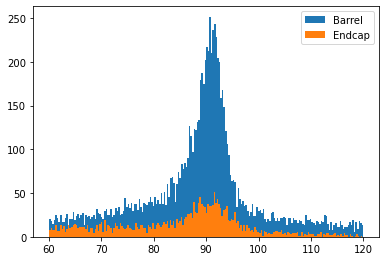

In [74]:
EBminv= (2*EB.pt1*EB.pt2*(np.cosh(EB.eta1-EB.eta2)-np.cos(EB.phi1-EB.phi2)))**(1/2)
EEminv = (2*EE.pt1*EE.pt2*(np.cosh(EE.eta1-EE.eta2)-np.cos(EE.phi1-EE.phi2)))**(1/2)

fig4= plt.figure()
ax4= fig4.add_axes([0.1,0.1,0.8,0.8])
ax4.hist(EBminv, bins= 200, label= 'Barrel')
ax4.hist(EEminv, bins=200, label= 'Endcap')
ax4.legend();

EBminv.std(),EEminv.std() 
print('The barrel has a smaller STD therefor gives a better resolution, this can also be seen in the graph with the barrel having a higher peak')

In [84]:
df = df[['pt1', 'eta1', 'phi1', 'pt2', 'eta2', 'phi2']]

print('eta1 and eta2 have a correlation of 0.6654 which is the strongest non 1 correlation')
df.head(), df.corr()

#M not in index error, so i removed M


eta1 and eta2 have a correlation of 0.6654 which is the strongest non 1 correlation


(       pt1      eta1      phi1      pt2     eta2     phi2
 0  37.5667  2.289180  2.052600  45.4315  1.47064 -1.16305
 1  36.2901 -0.837253 -1.585920  60.5754 -0.48957  1.04960
 2  25.9705 -0.697420  1.635990  45.2954 -2.04009  3.11875
 3  41.0075  1.461920 -0.532464  45.9013  1.15606  2.47858
 4  39.8985 -0.592666 -2.394720  34.8931 -2.24444  0.61061,
            pt1      eta1      phi1       pt2      eta2      phi2
 pt1   1.000000 -0.005495 -0.000376 -0.068503 -0.009661 -0.000184
 eta1 -0.005495  1.000000  0.015935  0.009975  0.665429 -0.022004
 phi1 -0.000376  0.015935  1.000000  0.000893  0.007323 -0.460515
 pt2  -0.068503  0.009975  0.000893  1.000000  0.010027 -0.000399
 eta2 -0.009661  0.665429  0.007323  0.010027  1.000000 -0.023955
 phi2 -0.000184 -0.022004 -0.460515 -0.000399 -0.023955  1.000000)